In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pdb

### Some pdb commands
    n or next: Continue execution until the next line in the current function is reached.
    c or continue: Continue execution until a breakpoint is encountered.
    q or quit: Exit the debugger and terminate the execution.
    l or list: Display the source code around the current line.
    p expression: Evaluate and print the value of the expression.
    s or step: Execute the current line and stop at the first possible occasion (e.g., in a function that is called).
    b NNN set breakpoint at line NNN
    b list breakpoints
    clear N  clear breakpoint number N (as reported by b)
    


In [2]:
# Bisection Method
def bisect(f, a, b, tol):
    """
    f: the function
    a: left end
    b: right end
    tol: tolerance to control when to stop the algo
    """
    pdb.set_trace()
    # Check if the algorithm needs to proceed
    if f(a) == 0:
        print('The solution is ', a)
        stop

    if f(b) == 0:
        print('The solution is ', b)
        stop

    if np.sign(f(a))*np.sign(f(b)) == 1:
        print('f(a)f(b) is not satisfied')
        stop

    # Start the algorithm
    fa = f(a)
    fb = f(b)
    while (b-a)/2 > tol:
        c = (a+b)/2
        fc = f(c)
        print('a=',a,'f(a)=',f(a))
        print('b=',b,'f(b)=',f(b))
        print('c=',c,'f(c)=',f(c)) 
        if fc == 0:
            break
        if np.sign(fc)*np.sign(fa)<0:
            # a and c form the new interval
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    
    return (a+b)/2

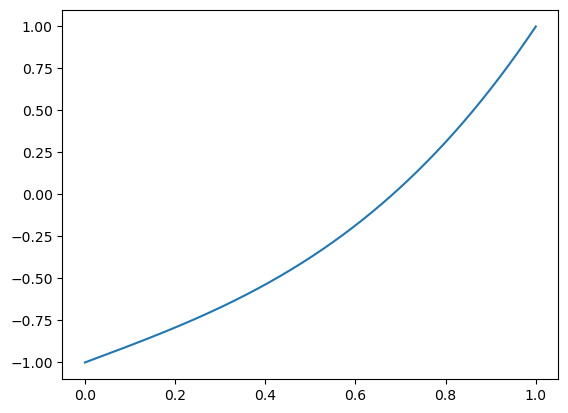

In [3]:
# First define the function:
def f_ex2(x):
    """
    The f from example 2
    """
    return x**3+x-1

# check what the graph looks like
x = np.linspace(0, 1, 1000)
plt.plot(x, f_ex2(x))

In [4]:
# Call the function, suppose tol=1e-5
tol = 1e-5
xc = bisect(f_ex2, 0, 1, tol)
print('The solution is ', xc)
# Check if the solution is right
print('The value of the function at x = ', 
      xc, ' is ', f_ex2(xc))

> <ipython-input-2-9fa7ce45f2c1>(11)bisect()
      9     pdb.set_trace()
     10     # Check if the algorithm needs to proceed
---> 11     if f(a) == 0:
     12         print('The solution is ', a)
     13         stop

ipdb> n
> <ipython-input-2-9fa7ce45f2c1>(15)bisect()
     13         stop
     14 
---> 15     if f(b) == 0:
     16         print('The solution is ', b)
     17         stop

ipdb> 
> <ipython-input-2-9fa7ce45f2c1>(19)bisect()
     17         stop
     18 
---> 19     if np.sign(f(a))*np.sign(f(b)) == 1:
     20         print('f(a)f(b) is not satisfied')
     21         stop

ipdb> 
> <ipython-input-2-9fa7ce45f2c1>(24)bisect()
     22 
     23     # Start the algorithm
---> 24     fa = f(a)
     25     fb = f(b)
     26     while (b-a)/2 > tol:

ipdb> 
> <ipython-input-2-9fa7ce45f2c1>(25)bisect()
     23     # Start the algorithm
     24     fa = f(a)
---> 25     fb = f(b)
     26     while (b-a)/2 > tol:
     27         c = (a+b)/2

ipdb> 
> <ipython-input-2-9fa7ce45f

In [5]:
# Function for fixed-point iteration 
# if f(x)=0 can be written as g(x)=x

def fpi(g,x_0,k):
    """
    g: the function g(x) in g(x)=x
    x_0: the initial guess
    k: the maximum number of interation steps
    """
    x = np.zeros(k+1,)
    x[0] = x_0
    
    for i in range(k):
        x[i+1] = g(x[i])
    
    return x[k]

In [6]:
# Define g firxt
def g_ex6(x):
    return np.cos(x)

# Applying fixed-point iteration
x_0 = 0
k = 1000
x_fpi = fpi(g_ex6, x_0, k)
print('The approximate solution of f(x)=cosx-x after ', 
     k, ' steps of fixed point iteration is ',
     x_fpi)

# Check if the result is a solution of f(x)
print()
print('The value of f at ', x_fpi, ' is: ', 
      g_ex6(x_fpi)-x_fpi)

The approximate solution of f(x)=cosx-x after  1000  steps of fixed point iteration is  0.7390851332151605

The value of f at  0.7390851332151605  is:  3.3306690738754696e-16


In [7]:
# Define g for the first choice in Example 7
def g_ex7_ch1(x):
    return 1-x**3

x_0 = 0.5
k_max = 12
res = np.zeros(k_max, )
res[0] = x_0
for k in range(1, k_max):
    res[k] = fpi(g_ex7_ch1, x_0, k)
    
print('   i   ', '   xi   ')
for i in range(0, k_max):
    print("{0:5f}, {1:5f}".format(i, res[i]))

   i       xi   
0.000000, 0.500000
1.000000, 0.875000
2.000000, 0.330078
3.000000, 0.964037
4.000000, 0.104054
5.000000, 0.998873
6.000000, 0.003376
7.000000, 1.000000
8.000000, 0.000000
9.000000, 1.000000
10.000000, 0.000000
11.000000, 1.000000


In [8]:
# Define g for the second choice in Example 7
def g_ex7_ch2(x):
    return (1-x)**(1/3)

x_0 = 0.5
k_max = 12
res = np.zeros(k_max, )
res[0] = x_0
for k in range(1, k_max):
    res[k] = fpi(g_ex7_ch2, x_0, k)
    
print('   i   ', '   xi   ')
for i in range(0, k_max):
    print("{0:5f}, {1:5f}".format(i, res[i]))

   i       xi   
0.000000, 0.500000
1.000000, 0.793701
2.000000, 0.590880
3.000000, 0.742364
4.000000, 0.636310
5.000000, 0.713801
6.000000, 0.659006
7.000000, 0.698633
8.000000, 0.670448
9.000000, 0.690729
10.000000, 0.676259
11.000000, 0.686646


In [9]:
# Define g for the second choice in Example 7
def g_ex7_ch3(x):
    return (1+2*x**3)/(1+3*x**2)

x_0 = 0.5
k_max = 12
res = np.zeros(k_max, )
res[0] = x_0
for k in range(1, k_max):
    res[k] = fpi(g_ex7_ch3, x_0, k)
    
print('   i   ', '   xi   ')
for i in range(0, k_max):
    print("{0:5f}, {1:5f}".format(i, res[i]))

   i       xi   
0.000000, 0.500000
1.000000, 0.714286
2.000000, 0.683180
3.000000, 0.682328
4.000000, 0.682328
5.000000, 0.682328
6.000000, 0.682328
7.000000, 0.682328
8.000000, 0.682328
9.000000, 0.682328
10.000000, 0.682328
11.000000, 0.682328


In [10]:
def g_ex10(x):
    return x+np.cos(x)-np.sin(x)

r = np.pi/4
x_0 = 0
k_max = 20
res = np.zeros(k_max, )
res[0] = x_0
print(' i  ', '        xi  ', '     g(xi)     ',
     'ei=|xi-r|', '  ei/ei-1 ')
print("{0:<7d}, {1:10.7f}, {2:10.7f}, {3:10.7f}, {4:7s} ".format(
        0, x_0, g_ex10(x_0), 
        np.abs(x_0-r), 
        '      '))

for k in range(1, k_max):
    res[k] = fpi(g_ex10, x_0, k)
    print("{0:<7d}, {1:10.7f}, {2:10.7f}, {3:10.7f}, {4:7f}".format(
        k, res[k], g_ex10(res[k]), 
        np.abs(res[k]-r), 
        np.abs(res[k]-r)/np.abs(res[k-1]-r)))

 i           xi        g(xi)      ei=|xi-r|   ei/ei-1 
0      ,  0.0000000,  1.0000000,  0.7853982,         
1      ,  1.0000000,  0.6988313,  0.2146018, 0.273240
2      ,  0.6988313,  0.8211025,  0.0865668, 0.403384
3      ,  0.8211025,  0.7706197,  0.0357043, 0.412448
4      ,  0.7706197,  0.7915189,  0.0147785, 0.413913
5      ,  0.7915189,  0.7828629,  0.0061207, 0.414162
6      ,  0.7828629,  0.7864483,  0.0025352, 0.414205
7      ,  0.7864483,  0.7849632,  0.0010501, 0.414212
8      ,  0.7849632,  0.7855783,  0.0004350, 0.414213
9      ,  0.7855783,  0.7853235,  0.0001802, 0.414214
10     ,  0.7853235,  0.7854291,  0.0000746, 0.414214
11     ,  0.7854291,  0.7853854,  0.0000309, 0.414214
12     ,  0.7853854,  0.7854035,  0.0000128, 0.414214
13     ,  0.7854035,  0.7853960,  0.0000053, 0.414214
14     ,  0.7853960,  0.7853991,  0.0000022, 0.414214
15     ,  0.7853991,  0.7853978,  0.0000009, 0.414214
16     ,  0.7853978,  0.7853983,  0.0000004, 0.414214
17     ,  0.7853983,  0.785

In [11]:
def g_ex11(x):
    return 2.8*x-x**2

x_0 = 0.1
k_max = 100
sol = fpi(g_ex11, x_0, k_max)
print('The approximate solution with FPI is ', 
     sol)

The approximate solution with FPI is  1.8000000000782124
